## **Análise de criptomoedas com regressão linear simples e múltipla**

### **Regressão linear simples**

In [9]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

Lista das criptomoedas

In [10]:
criptos = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'SOL-USD', 'USDC-USD', 'XRP-USD', 'TRX-USD']

Download dos dados

In [11]:
cripto_data = yf.download(criptos, start='2021-01-01', end='2024-07-30')['Close']

cripto_data

[*********************100%%**********************]  7 of 7 completed


Ticker,BTC-USD,ETH-USD,SOL-USD,TRX-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2021-01-01,29374.152344,730.367554,1.842084,0.026940,0.999823,1.001916,0.237444
2021-01-02,32127.267578,774.534973,1.799275,0.027219,1.000162,1.000600,0.221655
2021-01-03,32782.023438,975.507690,2.161752,0.029495,0.999736,1.000514,0.225848
2021-01-04,31971.914062,1040.233032,2.485097,0.030853,0.999372,1.000128,0.236677
2021-01-05,33992.429688,1100.006104,2.157217,0.028632,0.999749,1.002202,0.226750
...,...,...,...,...,...,...,...
2024-07-25,65777.226562,3174.427246,171.963074,0.135458,1.000014,0.999811,0.599816
2024-07-26,67912.062500,3275.951416,183.136719,0.137564,1.000179,1.000176,0.604068
2024-07-27,67813.335938,3247.607910,184.085403,0.137258,1.000055,1.000087,0.596795


Calculando a variação percentual diária

In [12]:
cripto_data = cripto_data.pct_change() * 100

cripto_data

Ticker,BTC-USD,ETH-USD,SOL-USD,TRX-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,9.372578,6.047287,-2.323944,1.035635,0.033909,-0.131355,-6.649569
2021-01-03,2.038007,25.947533,20.145722,8.361812,-0.042593,-0.008590,1.891682
2021-01-04,-2.471200,6.635042,14.957541,4.604166,-0.036410,-0.038580,4.794818
2021-01-05,6.319658,5.746123,-13.193848,-7.198650,0.037724,0.207374,-4.194326
...,...,...,...,...,...,...,...
2024-07-25,0.619673,-4.852987,-3.409061,0.809700,0.014796,-0.001103,-3.074608
2024-07-26,3.245555,3.198189,6.497700,1.554734,0.016510,0.036503,0.708877
2024-07-27,-0.145374,-0.865199,0.518020,-0.222449,-0.012407,-0.008891,-1.203997


Verificando se há valores infinitos ou nulos após a limpeza

In [13]:
print("Verificando valores nulos e infinitos após a limpeza:")
print(cripto_data.isnull().sum())
print((cripto_data == float('inf')).sum())
print((cripto_data == float('-inf')).sum())

Verificando valores nulos e infinitos após a limpeza:
Ticker
BTC-USD     1
ETH-USD     1
SOL-USD     1
TRX-USD     1
USDC-USD    1
USDT-USD    1
XRP-USD     1
dtype: int64
Ticker
BTC-USD     0
ETH-USD     0
SOL-USD     0
TRX-USD     0
USDC-USD    0
USDT-USD    0
XRP-USD     0
dtype: int64
Ticker
BTC-USD     0
ETH-USD     0
SOL-USD     0
TRX-USD     0
USDC-USD    0
USDT-USD    0
XRP-USD     0
dtype: int64


Removendo valores nulos

In [14]:
cripto_data.dropna(inplace=True)

cripto_data

Ticker,BTC-USD,ETH-USD,SOL-USD,TRX-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2021-01-02,9.372578,6.047287,-2.323944,1.035635,0.033909,-0.131355,-6.649569
2021-01-03,2.038007,25.947533,20.145722,8.361812,-0.042593,-0.008590,1.891682
2021-01-04,-2.471200,6.635042,14.957541,4.604166,-0.036410,-0.038580,4.794818
2021-01-05,6.319658,5.746123,-13.193848,-7.198650,0.037724,0.207374,-4.194326
2021-01-06,8.331071,9.736862,-10.569175,6.576558,-0.006803,-0.067253,10.648288
...,...,...,...,...,...,...,...
2024-07-25,0.619673,-4.852987,-3.409061,0.809700,0.014796,-0.001103,-3.074608
2024-07-26,3.245555,3.198189,6.497700,1.554734,0.016510,0.036503,0.708877
2024-07-27,-0.145374,-0.865199,0.518020,-0.222449,-0.012407,-0.008891,-1.203997


#### **Com outliers**

Visualizar a relação entre a variação percentual diária de uma criptomoeda com outra para identificar possíveis padrões.

In [ ]:
# Visualizando a relação entre a variação percentual diária de BTC e ETH
fig = px.scatter(cripto_data, x='BTC-USD', y='ETH-USD', template='simple_white', title='Relação entre BTC e ETH')
fig.show()

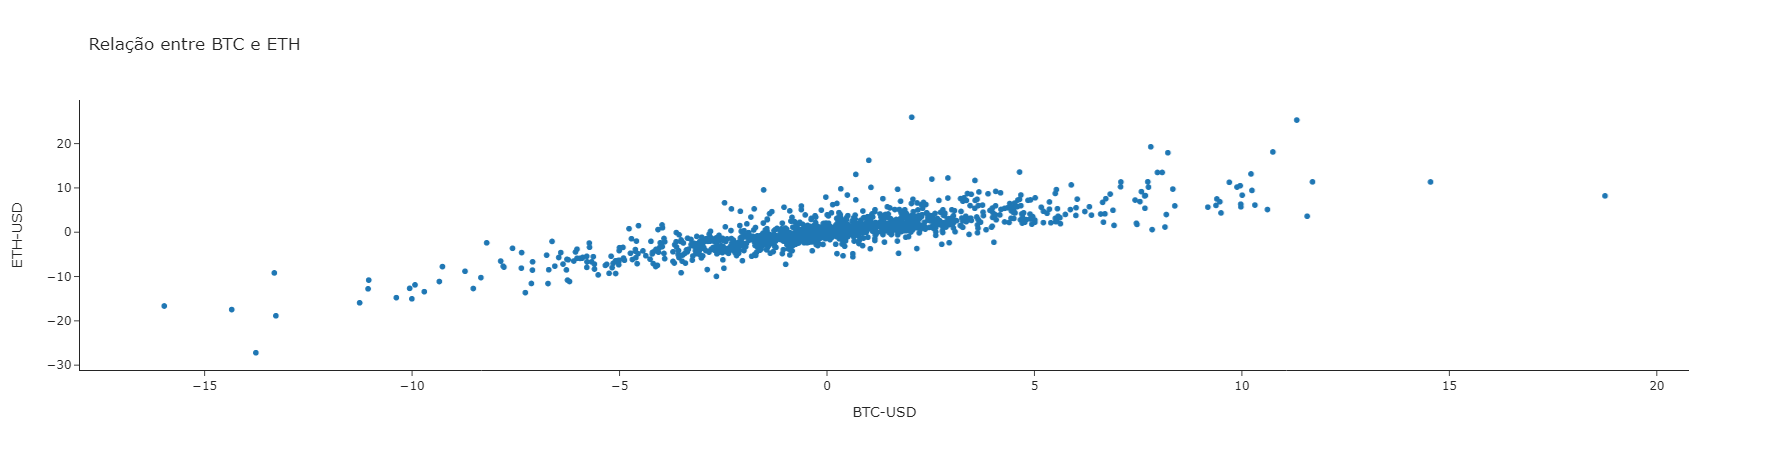

Modelo de regressão linear entre BTC e ETH

In [16]:
slope, intercept, r_outliers, p_outlier, std_err = stats.linregress(cripto_data['BTC-USD'], cripto_data['ETH-USD'])

print(f"Inclinação: {slope}")
print(f"Intercepto: {intercept}")
print(f"R-quadrado: {r_outliers**2}")
print(f"P-valor: {p_outlier}")

Inclinação: 1.0428504175819826
Intercepto: 0.08369946742676473
R-quadrado: 0.6567224173913117
P-valor: 8.10076562152405e-305


#### **Remoção de outliers**

Cálculo do IQR

In [17]:
Q1 = cripto_data['BTC-USD'].quantile(0.25)
Q3 = cripto_data['BTC-USD'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)


-1.3850552916312875
1.6057021949669181


Definindo os limites. Medir a amplitude dos dados entre o 25º e o 75º percentil, excluindo os extremos.

In [18]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior: {limite_inferior},\nLimite Superior: {limite_superior}")

Limite Inferior: -5.871191521528596,
Limite Superior: 6.0918384248642266


In [19]:
cripto_data_sem_outliers = cripto_data[(cripto_data['BTC-USD'] >= limite_inferior) & (cripto_data['BTC-USD'] <= limite_superior)]

cripto_data_sem_outliers

Ticker,BTC-USD,ETH-USD,SOL-USD,TRX-USD,USDC-USD,USDT-USD,XRP-USD
Date,,,,,,,
2021-01-03,2.038007,25.947533,20.145722,8.361812,-0.042593,-0.008590,1.891682
2021-01-04,-2.471200,6.635042,14.957541,4.604166,-0.036410,-0.038580,4.794818
2021-01-08,3.623390,-0.120828,35.703035,-1.464528,0.177569,-0.035486,-0.850303
2021-01-09,-1.331114,4.646321,5.139774,11.148862,0.009307,0.290190,1.140368
2021-01-10,-4.715257,-1.469901,2.384635,-3.206371,0.031305,-0.271593,-2.624527
...,...,...,...,...,...,...,...
2024-07-25,0.619673,-4.852987,-3.409061,0.809700,0.014796,-0.001103,-3.074608
2024-07-26,3.245555,3.198189,6.497700,1.554734,0.016510,0.036503,0.708877
2024-07-27,-0.145374,-0.865199,0.518020,-0.222449,-0.012407,-0.008891,-1.203997


Modelo de regressão linear entre BTC e ETH após remover outliers

In [20]:
slope, intercept, r_no_outliers, p_no_outliers, std_err = stats.linregress(cripto_data_sem_outliers['BTC-USD'], cripto_data_sem_outliers['ETH-USD'])

print(f"Inclinação: {slope}")
print(f"Intercepto: {intercept}")
print(f"R-quadrado: {r_no_outliers**2}")
print(f"P-valor: {p_no_outliers}")

Inclinação: 1.0695998840015957
Intercepto: 0.16592871834463935
R-quadrado: 0.5317609334096618
P-valor: 4.118354012708975e-200


In [ ]:
# Visualizando a relação entre a variação percentual diária de BTC e ETH
fig = px.scatter(cripto_data_sem_outliers, x='BTC-USD', y='ETH-USD', template='simple_white', title='Relação entre BTC e ETH')
fig.show()

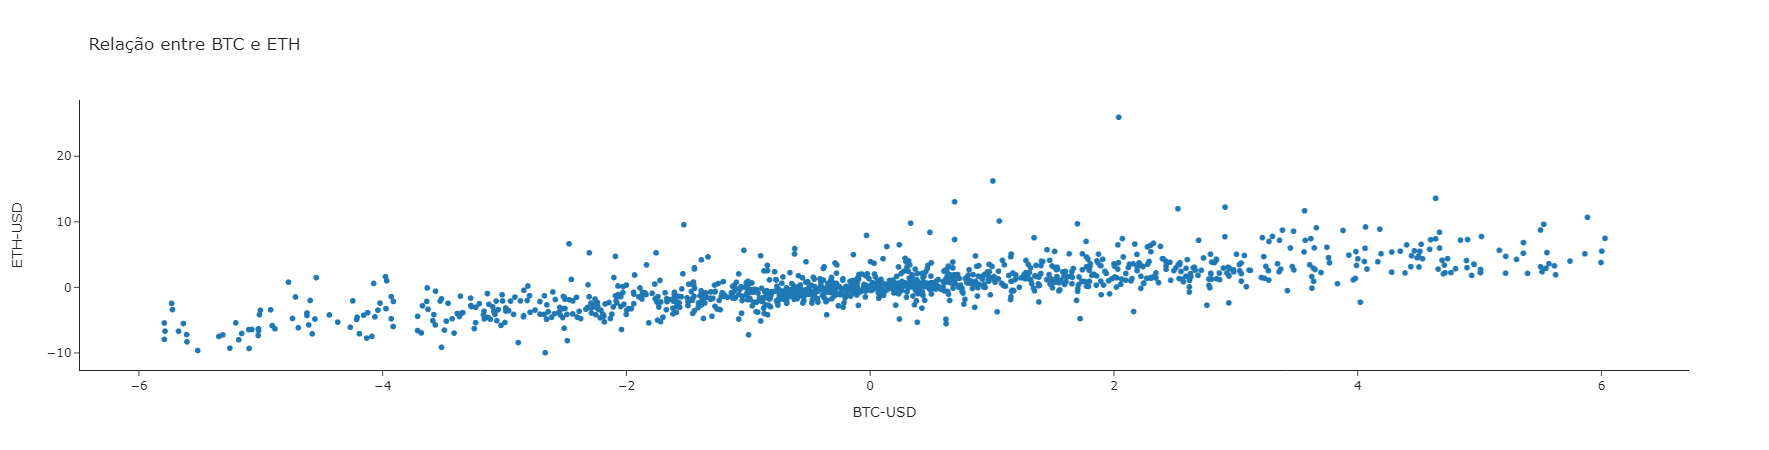

Comparar com os resultados originais

In [23]:
print("Comparação dos Resultados com e sem Outliers:")
print(f"R-quadrado Original: {r_outliers**2} com Outliers vs. {r_no_outliers**2} sem Outliers")

Comparação dos Resultados com e sem Outliers:
R-quadrado Original: 0.6567224173913117 com Outliers vs. 0.5317609334096618 sem Outliers


### **Regressão linear múltipla**

Adicionando preditores para a regressão múltipla

In [25]:
preditores = cripto_data[['BTC-USD', 'USDT-USD', 'SOL-USD', 'USDC-USD', 'XRP-USD', 'TRX-USD']]

preditores

Ticker,BTC-USD,USDT-USD,SOL-USD,USDC-USD,XRP-USD,TRX-USD
Date,,,,,,
2021-01-02,9.372578,-0.131355,-2.323944,0.033909,-6.649569,1.035635
2021-01-03,2.038007,-0.008590,20.145722,-0.042593,1.891682,8.361812
2021-01-04,-2.471200,-0.038580,14.957541,-0.036410,4.794818,4.604166
2021-01-05,6.319658,0.207374,-13.193848,0.037724,-4.194326,-7.198650
2021-01-06,8.331071,-0.067253,-10.569175,-0.006803,10.648288,6.576558
...,...,...,...,...,...,...
2024-07-25,0.619673,-0.001103,-3.409061,0.014796,-3.074608,0.809700
2024-07-26,3.245555,0.036503,6.497700,0.016510,0.708877,1.554734
2024-07-27,-0.145374,-0.008891,0.518020,-0.012407,-1.203997,-0.222449


Incluindo constante no modelo

In [26]:
X = sm.add_constant(preditores)
y = cripto_data['ETH-USD']

Ajustando o modelo de regressão múltipla e imprimir resultados

In [28]:
est = sm.OLS(y, X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                ETH-USD   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     542.8
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:32:07   Log-Likelihood:                -2915.6
No. Observations:                1305   AIC:                             5845.
Df Residuals:                    1298   BIC:                             5882.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.063      0.075      0.9

### **Matriz de correlação**

Criando o mapa de calor da correlação entre as criptomoedas

In [29]:
corr_matrix = cripto_data.corr()

corr_matrix

Ticker,BTC-USD,ETH-USD,SOL-USD,TRX-USD,USDC-USD,USDT-USD,XRP-USD
Ticker,,,,,,,
BTC-USD,1.000000,0.810384,0.570884,0.599668,0.017210,0.046951,0.556236
ETH-USD,0.810384,1.000000,0.620131,0.609609,-0.009049,0.038646,0.565580
SOL-USD,0.570884,0.620131,1.000000,0.437569,-0.005836,-0.001325,0.455409
TRX-USD,0.599668,0.609609,0.437569,1.000000,-0.005236,-0.008961,0.535637
USDC-USD,0.017210,-0.009049,-0.005836,-0.005236,1.000000,0.154527,-0.029855
USDT-USD,0.046951,0.038646,-0.001325,-0.008961,0.154527,1.000000,-0.004655
XRP-USD,0.556236,0.565580,0.455409,0.535637,-0.029855,-0.004655,1.000000


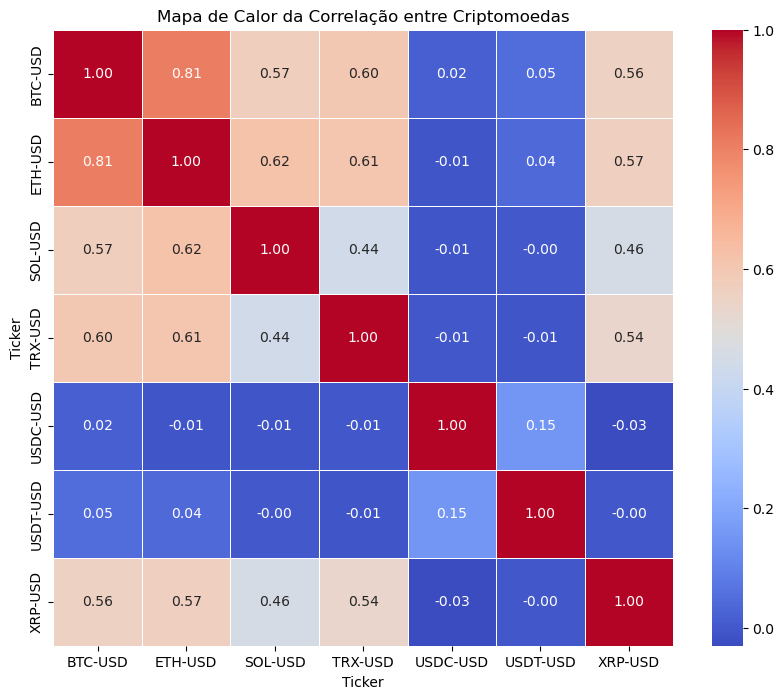

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor da Correlação entre Criptomoedas')
plt.show()